In [1]:
import numpy as np
from math import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

def hcs_read_raw(filename):
    # RAW LINEAR OUT: UINT32 magic='HCSR', UINT8 dim, UINT16 level, UINT32 bytes_per_element, UINT64 N, N * bytes_per_element values
    f = open(filename, "rb") 
    fheader = np.fromfile(f, dtype=np.dtype([('magic', 'u4'), ('dim', 'u1'), ('level', 'u2'), ('bpe', 'u4'),  ('n', 'u8')]), count=1)
    # Assuming double as data_t 
    elements = int(fheader["bpe"][0] / 8)
    shape = [2**int(fheader["level"])]*int(fheader["dim"]) + [int(elements)]
    data = np.fromfile(f, dtype=np.dtype(str(elements) + 'f8'))
    data = data.reshape(shape)
    f.close()
    return data

def hcs_1d_x(level):
    num = 2**level
    return np.linspace(1/num/2, 1.0-1/num/2, num=num)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  app.launch_new_instance()


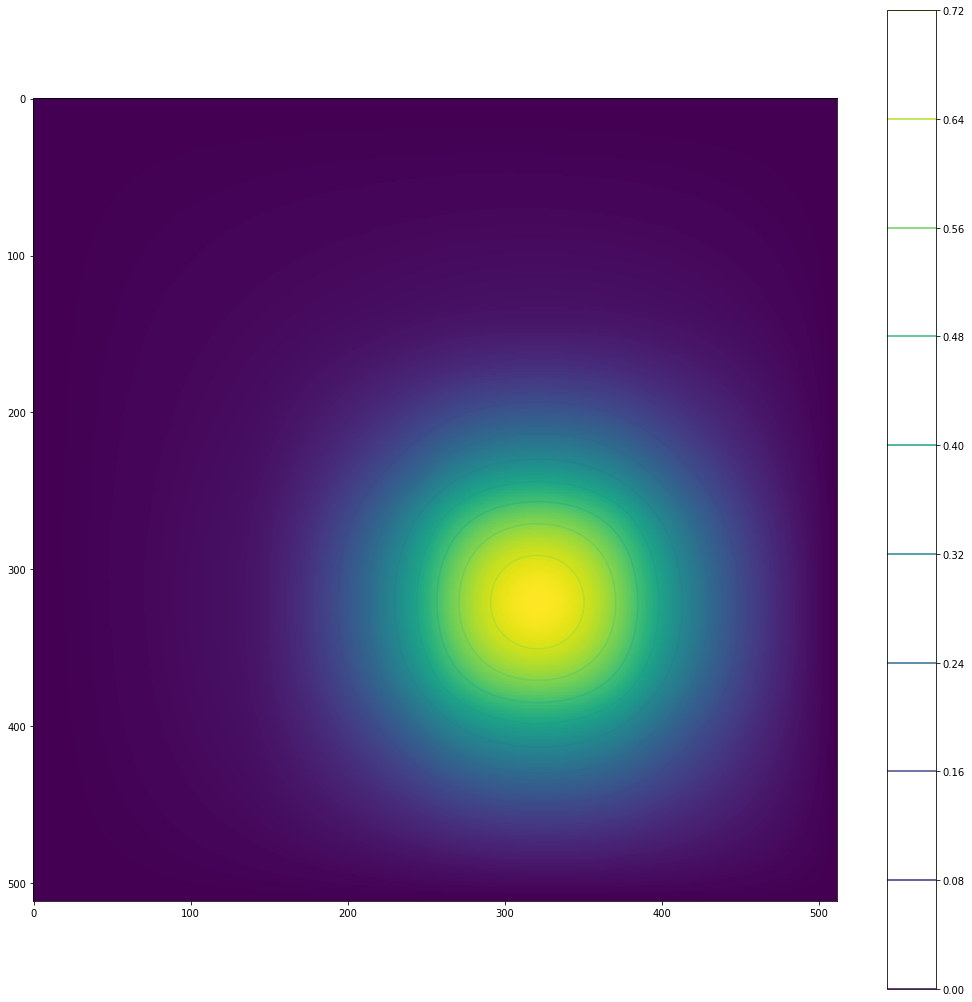

In [11]:
data9 = hcs_read_raw("test9_9.raw")
data9b = hcs_read_raw("btest9_9.raw")
data9v = hcs_read_raw("test9v_9.raw")
data8 = hcs_read_raw("test9_8.raw")
data7 = hcs_read_raw("test9_7.raw")
data6 = hcs_read_raw("test9_6.raw")
data5 = hcs_read_raw("test9_5.raw")
data4 = hcs_read_raw("test9_4.raw")
data3 = hcs_read_raw("test9_3.raw")
data2 = hcs_read_raw("test9_2.raw")
data1 = hcs_read_raw("test9_1.raw")
fig, ax = plt.subplots(figsize=(18, 18))
#fig, ax = plt.subplots()
#cax=ax.imshow(np.power(data9v.squeeze()[:,:,1],1), interpolation='nearest')
cax=ax.imshow(np.power(data9b.squeeze()[:,:],1), interpolation='nearest')
cax=ax.contour(np.power(data9b.squeeze()[:,:],1), 10)
fig.colorbar(cax)

In [4]:
#fig, ax = plt.subplots(figsize=(18, 18))
#ax.set_aspect("equal")
#cax=ax.contourf(np.power(data.squeeze(),1))
#fig.colorbar(cax)


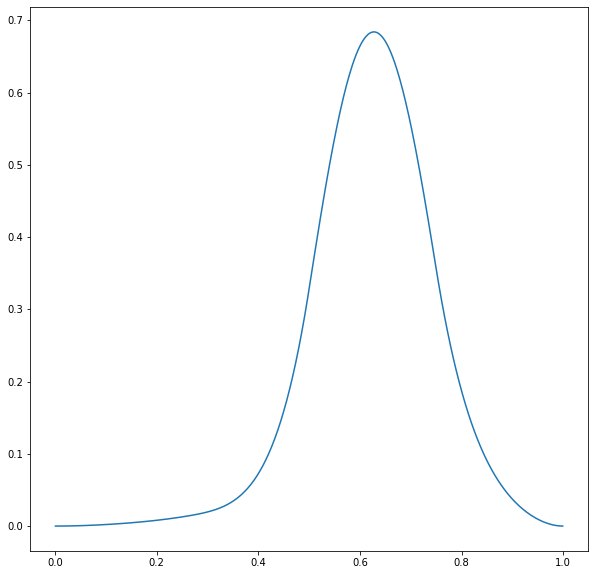

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(hcs_1d_x(9),np.diagonal(data9).squeeze())
#ax.plot(hcs_1d_x(9),data9[:,255].squeeze())
#ax.plot(hcs_1d_x(5),data5[:,int(255/2/2/2/2)].squeeze())
#ax.plot(hcs_1d_x(6),data6[:,int(255/2/2/2)].squeeze())
#ax.plot(data9.squeeze())
#amax=(data9.squeeze()/(1)).max()
#data1.squeeze()
#ax.plot(x__,((-(x__-0.5)**2)*amax*4)+amax)